# Machine Learning in the Real World

#               1. Data preparation and cleaning (Pre Processing )

### Import Python Libraries

In [578]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.linear_model as lm
from sklearn import metrics, preprocessing, svm
from sklearn.model_selection import cross_val_score


%matplotlib inline

### Data Loading

In [579]:
train_raw_data = pd.read_table('train.tsv')
test_raw_data = pd.read_table('test.tsv')
train_data = train_raw_data.copy()
test_data = test_raw_data.copy()
# all_data = train_data.append(test_data, ignore_index = True)

### Replace missing values to NaN

In [580]:
# missing values are appearing as '?', replace them with np.nan
for variable in test_data.columns:
    train_data[variable] = train_data[variable].replace('?', np.nan)
    test_data[variable] = test_data[variable].replace('?', np.nan)

## Type Conversion

In [288]:
train_data[:].dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

### Specifying Data Types

In [581]:
# irrelevant_variables = ["url", "urlid"] # lengthyLinkDomain?
# string_variables = ["boilerplate"]
# numeric_variables = ["alchemy_category_score", "avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", "compression_ratio", "embed_ratio", "frameTagRatio", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", "numwords_in_url", "parametrizedLinkRatio", "spelling_errors_ratio", "html_ratio", "image_ratio"]
# categorical_variables = ["alchemy_category"]
# binary_variables = ["framebased", "hasDomainLink", "is_news", "lengthyLinkDomain", "news_front_page"]

irrelevant_variables = ["urlid"]
string_variables = ["url","boilerplate", "alchemy_category"]
categorial_variables = ["alchemy_category"]
numeric_variables = list(test_data)[4:]

for variable in numeric_variables:
        train_data[variable] = train_data[variable].astype(np.float)
        test_data[variable] = test_data[variable].astype(np.float)

## Missing Data Imputation

In [493]:
print (np.sum(test_data[:].isnull()))

url                                  0
urlid                                0
boilerplate                          0
alchemy_category                  1046
alchemy_category_score            1046
avglinksize                          0
commonlinkratio_1                    0
commonlinkratio_2                    0
commonlinkratio_3                    0
commonlinkratio_4                    0
compression_ratio                    0
embed_ratio                          0
framebased                           0
frameTagRatio                        0
hasDomainLink                        0
html_ratio                           0
image_ratio                          0
is_news                           1225
lengthyLinkDomain                    0
linkwordscore                        0
news_front_page                    583
non_markup_alphanum_characters       0
numberOfLinks                        0
numwords_in_url                      0
parametrizedLinkRatio                0
spelling_errors_ratio    

In [582]:
missing_varibales = ['alchemy_category', 'alchemy_category_score', 'is_news', 'news_front_page']

# alchemy_category
train_data['alchemy_category'] = train_data['alchemy_category'].fillna('unknown') # NaN to unknown
test_data['alchemy_category'] = test_data['alchemy_category'].fillna('unknown')

# alchemy_category_score
train_data['alchemy_category_score'].fillna(train_data['alchemy_category_score'].median(), inplace=True) # NaN to median
test_data['alchemy_category_score'].fillna(train_data['alchemy_category_score'].median(), inplace=True)

# news_front_page
train_data.ix[train_data.is_news == 0, 'news_front_page'] = 0 # if it is not news, it is not front page news
train_data['news_front_page'].fillna(train_data['news_front_page'].mean(), inplace=True) # NaN to mean
test_data.ix[test_data.is_news == 0, 'news_front_page'] = 0 
test_data['news_front_page'].fillna(train_data['news_front_page'].mean(), inplace=True) 

# is_news
train_data.ix[train_data.news_front_page == 1, 'is_news'] = 1 #if it is front page news it is news
train_data['is_news'].fillna(train_data['is_news'].mean(), inplace=True)  # NaN to mean
test_data.ix[test_data.news_front_page == 1, 'is_news'] = 1
test_data['is_news'].fillna(train_data['is_news'].mean(), inplace=True)  

# np.sum(test_data[missing_varibales].isnull())

# 2. Data Exploration

In [296]:
all_data = train_data.append(test_data, ignore_index = True)
all_data[numeric_variables].describe()
#notice embed ratio, compression ratio, and image ratio

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,...,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
count,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.0,10566.000000,...,10566.000000,10566.0,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000,10566.000000
mean,0.607891,2.823754,0.467895,0.212166,0.091431,0.048837,2.291272,-0.104571,0.0,0.056923,...,0.270157,1.0,0.654363,30.052054,0.048202,5711.308537,176.002177,4.908764,0.171628,0.101341
std,0.177226,12.904732,0.201926,0.146180,0.095443,0.072308,5.757324,0.307991,0.0,0.042005,...,1.761854,0.0,0.475598,20.462632,0.194751,9468.390487,170.120019,3.206950,0.182907,0.080126
min,0.070833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,...,-1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.536762,1.605949,0.339668,0.103896,0.021505,0.000000,0.442374,0.000000,0.0,0.028610,...,0.025210,1.0,0.000000,14.000000,0.000000,1563.250000,81.000000,3.000000,0.039425,0.068182
50%,0.625616,2.084034,0.480193,0.200000,0.067416,0.021368,0.483160,0.000000,0.0,0.046436,...,0.080800,1.0,1.000000,25.000000,0.000000,3473.000000,138.000000,5.000000,0.112220,0.089202
75%,0.704306,2.615385,0.614852,0.297872,0.132743,0.064516,0.580402,0.000000,0.0,0.074074,...,0.233406,1.0,1.000000,43.000000,0.000000,6331.000000,221.000000,7.000000,0.240385,0.112245
max,0.999812,1062.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.928571,0.0,0.444444,...,113.333333,1.0,1.000000,100.000000,1.000000,331764.000000,4997.000000,22.000000,1.000000,1.000000


In [251]:
all_data[['embed_ratio','compression_ratio','image_ratio']].describe()

,embed_ratio,compression_ratio,image_ratio
count,10566.000000,10566.000000,10566.000000
mean,-0.104571,2.291272,0.270157
std,0.307991,5.757324,1.761854
min,-1.000000,0.000000,-1.000000
25%,0.000000,0.442374,0.025210
50%,0.000000,0.483160,0.080800
75%,0.000000,0.580402,0.233406
max,0.928571,21.000000,113.333333


In [252]:
ratios = ['commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4', 
          'compression_ratio', 'embed_ratio', 'frameTagRatio', 'parametrizedLinkRatio', 'spelling_errors_ratio',
          'image_ratio', 'html_ratio']

for r in ratios:
    less_than_zero = all_data[r].loc[all_data[r] < 0].count()
    greater_than_one =  all_data[r].loc[all_data[r] > 1].count()
    if less_than_zero > 0:
        print(str(less_than_zero) + " valuses less than 0 in ratio: " + r)
    if greater_than_one > 0:
        print(str(greater_than_one) + " valuses greater than 1 in ratio: " + r)

1123 valuses greater than 1 in ratio: compression_ratio
1116 valuses less than 0 in ratio: embed_ratio
1001 valuses less than 0 in ratio: image_ratio
658 valuses greater than 1 in ratio: image_ratio


### Numeric features histograms

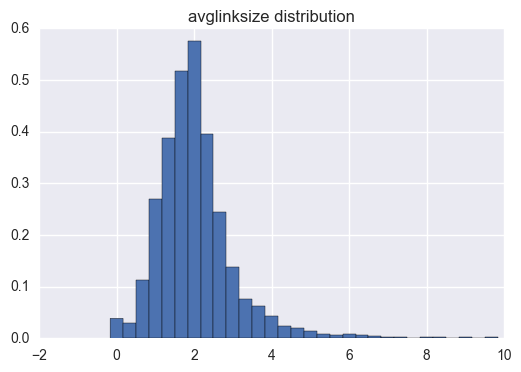

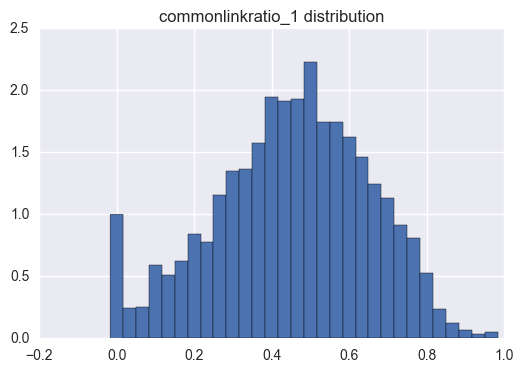

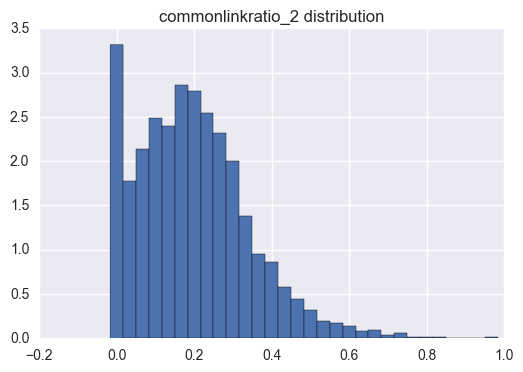

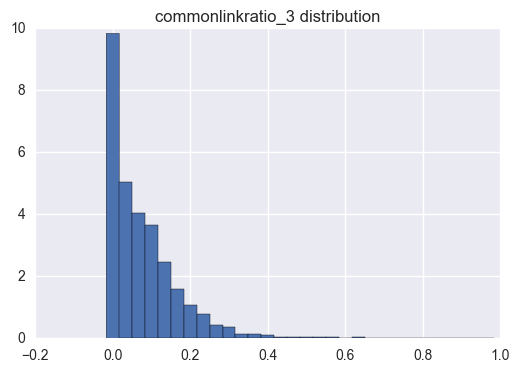

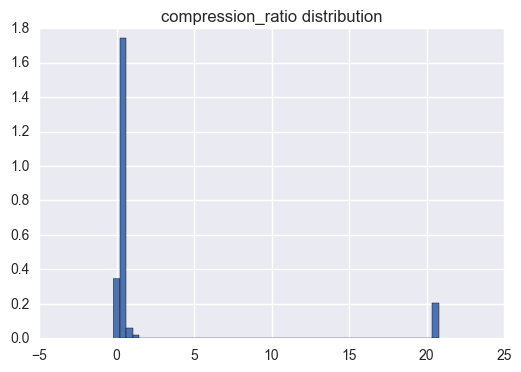

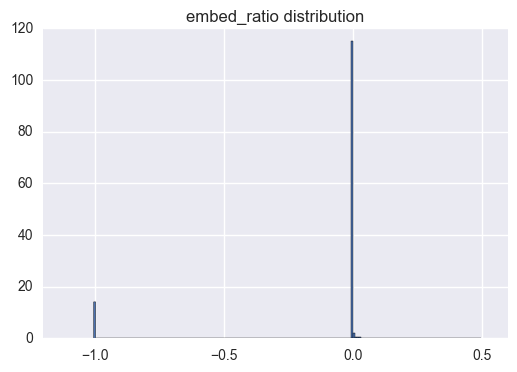

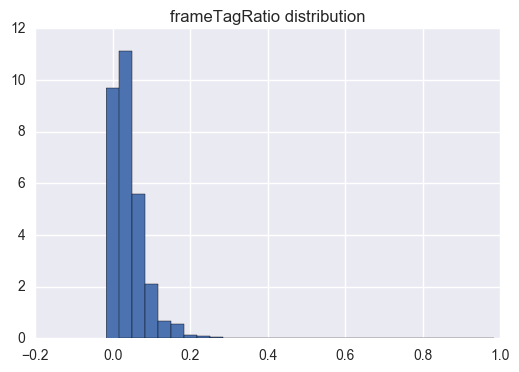

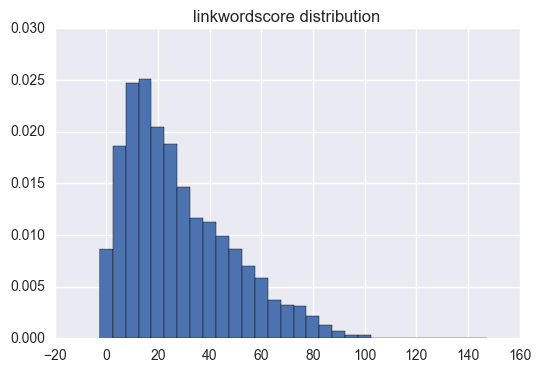

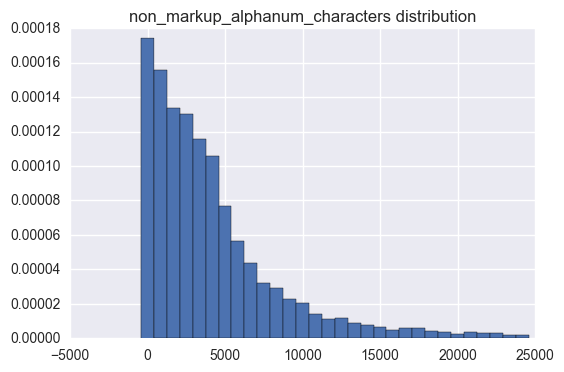

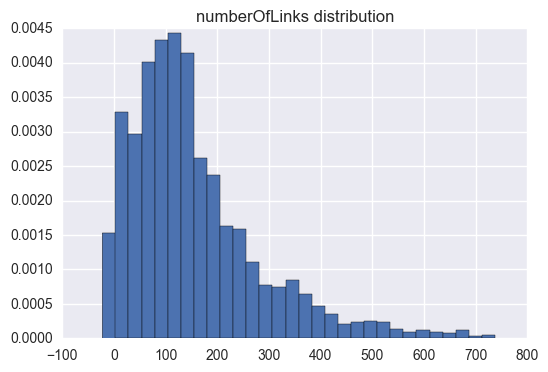

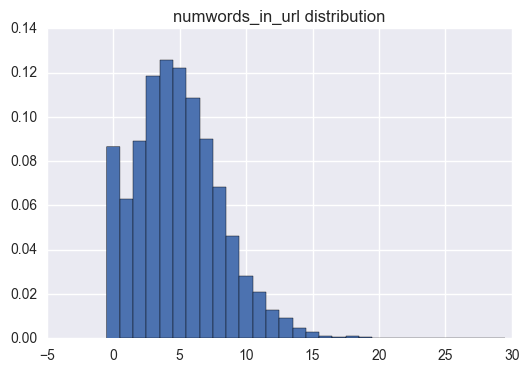

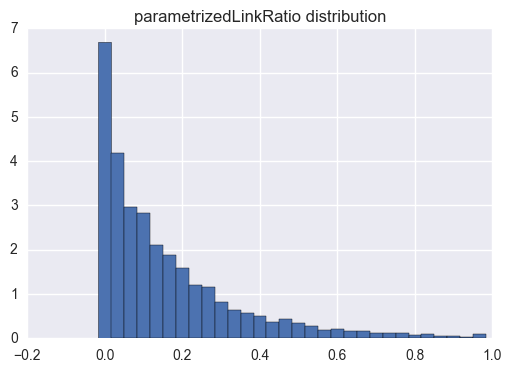

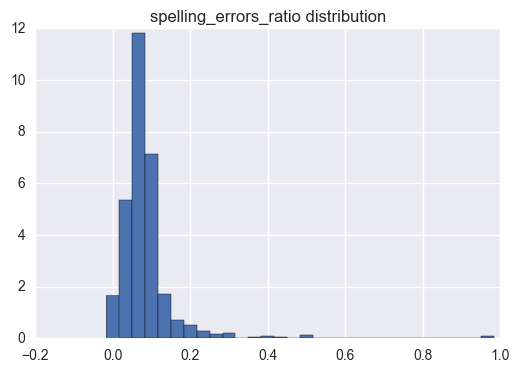

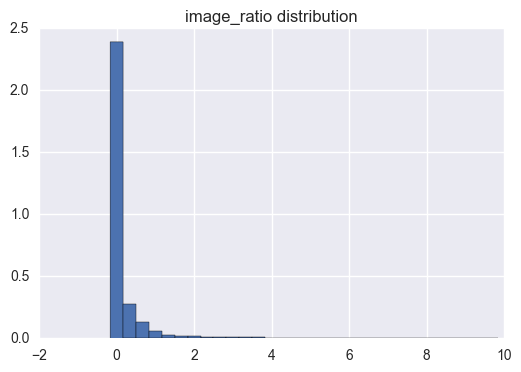

In [84]:

plt.hist(all_data['avglinksize'], normed=True, bins = 30, range=(0,10), align = 'left')
plt.title('avglinksize distribution')
plt.show()

plt.hist(all_data['commonlinkratio_1'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('commonlinkratio_1 distribution')
plt.show()

plt.hist(all_data['commonlinkratio_2'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('commonlinkratio_2 distribution')
plt.show()

plt.hist(all_data['commonlinkratio_3'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('commonlinkratio_3 distribution')
plt.show()

plt.hist(all_data['compression_ratio'], normed=True, bins = 50, align = 'left') #????
plt.title('compression_ratio distribution')
plt.show()

plt.hist(all_data['embed_ratio'], normed=True, bins = 200, range=(-1,0.5), align = 'left')# will become binary
plt.title('embed_ratio distribution')
plt.show()

plt.hist(all_data['frameTagRatio'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('frameTagRatio distribution')
plt.show()

plt.hist(all_data['linkwordscore'], normed=True, bins = 30, range=(0,150), align = 'left')
plt.title('linkwordscore distribution')
plt.show()

plt.hist(all_data['non_markup_alphanum_characters'], normed=True, bins = 30, range=(-10,25000), align = 'left')
plt.title('non_markup_alphanum_characters distribution')
plt.show()

plt.hist(all_data['numberOfLinks'], normed=True, bins = 30, range=(-10,750), align = 'left')
plt.title('numberOfLinks distribution')
plt.show()

plt.hist(all_data['numwords_in_url'], normed=True, bins = 30, range=(0,30), align = 'left')
plt.title('numwords_in_url distribution')
plt.show()

plt.hist(all_data['parametrizedLinkRatio'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('parametrizedLinkRatio distribution')
plt.show()

plt.hist(all_data['spelling_errors_ratio'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('spelling_errors_ratio distribution')
plt.show()

plt.hist(all_data['image_ratio'], normed=True, bins = 30, range=(0,10), align = 'left')
plt.title('image_ratio distribution')
plt.show()



### Categorical feature bars

-------------------------------
Histogram for alchemy_category
-------------------------------
unknown               3394
recreation            1701
arts_entertainment    1363
business              1235
health                 706
sports                 566
culture_politics       499
computer_internet      430
science_technology     409
gaming                 110
religion               107
law_crime               42
weather                  4
Name: alchemy_category, dtype: int64



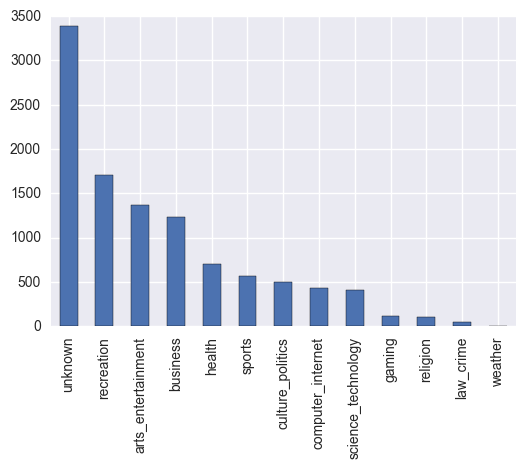

In [78]:
for variable in categorical_variables:
  print ("-------------------------------")
  print ("Histogram for " + variable)
  print ("-------------------------------")
  print (all_data[variable].value_counts())
  print ("")
all_data.alchemy_category.value_counts().plot(kind='bar')

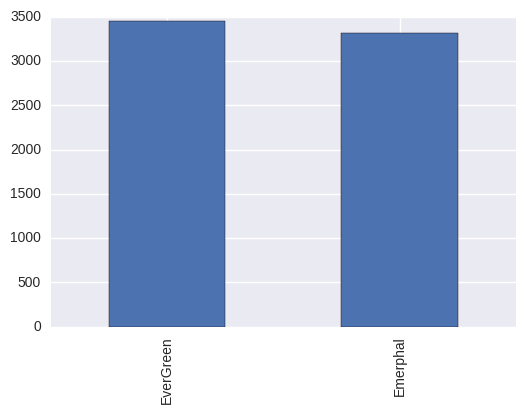

In [347]:
named_labels = train_labels.map({0:'Emerphal', 1:'EverGreen'})
named_labels.value_counts().plot(kind='bar')

### Corelations

In [35]:
all_data[ratios].corr()

,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,parametrizedLinkRatio,spelling_errors_ratio,image_ratio,html_ratio
commonlinkratio_1,1.000000,0.805516,0.561159,0.388081,-0.021166,0.007596,-0.291902,-0.077558,-0.052335,-0.067458,-0.200099
commonlinkratio_2,0.805516,1.000000,0.760680,0.555669,-0.037829,0.024076,-0.262819,-0.083728,-0.041608,-0.043157,-0.166438
commonlinkratio_3,0.561159,0.760680,1.000000,0.851192,-0.021917,0.008973,-0.224793,-0.009480,-0.015782,-0.045600,-0.136121
commonlinkratio_4,0.388081,0.555669,0.851192,1.000000,-0.025852,0.008492,-0.188095,0.039001,-0.017570,-0.030707,-0.140531
compression_ratio,-0.021166,-0.037829,-0.021917,-0.025852,1.000000,-0.894583,0.164354,-0.035573,0.351655,-0.208781,0.098001
embed_ratio,0.007596,0.024076,0.008973,0.008492,-0.894583,1.000000,-0.140961,0.039681,-0.329858,0.211974,-0.087971
frameTagRatio,-0.291902,-0.262819,-0.224793,-0.188095,0.164354,-0.140961,1.000000,-0.096711,0.031763,-0.097082,0.393338
parametrizedLinkRatio,-0.077558,-0.083728,-0.009480,0.039001,-0.035573,0.039681,-0.096711,1.000000,-0.010416,0.134253,-0.175521
spelling_errors_ratio,-0.052335,-0.041608,-0.015782,-0.017570,0.351655,-0.329858,0.031763,-0.010416,1.000000,-0.000593,0.023424
image_ratio,-0.067458,-0.043157,-0.045600,-0.030707,-0.208781,0.211974,-0.097082,0.134253,-0.000593,1.000000,-0.177183


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6307188f90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6306fa9f10>]], dtype=object)

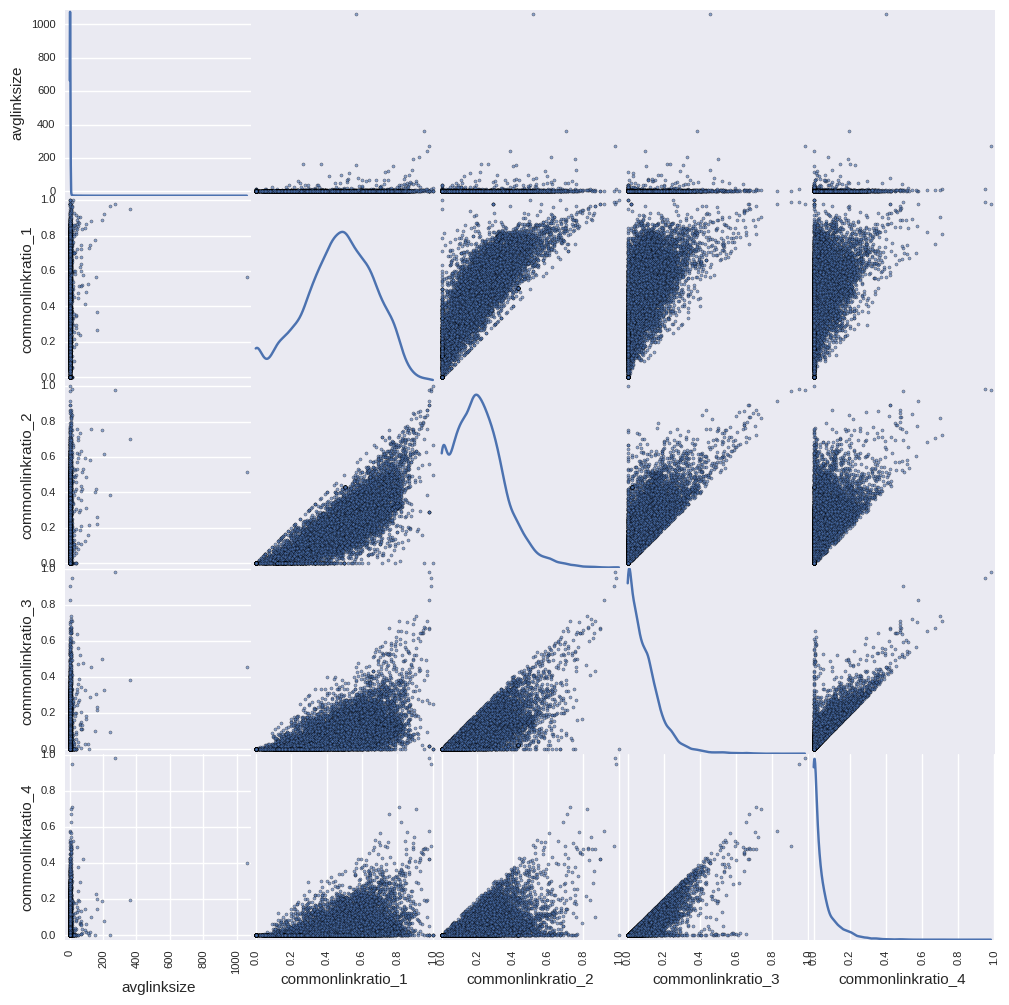

In [203]:
word_link_ratio = all_data[['avglinksize','commonlinkratio_1','commonlinkratio_2','commonlinkratio_3','commonlinkratio_4']]
pd.tools.plotting.scatter_matrix(word_link_ratio, alpha = 0.6, figsize = (12,12), diagonal = 'kde' )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f630844dbd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f63088b1f10>]], dtype=object)

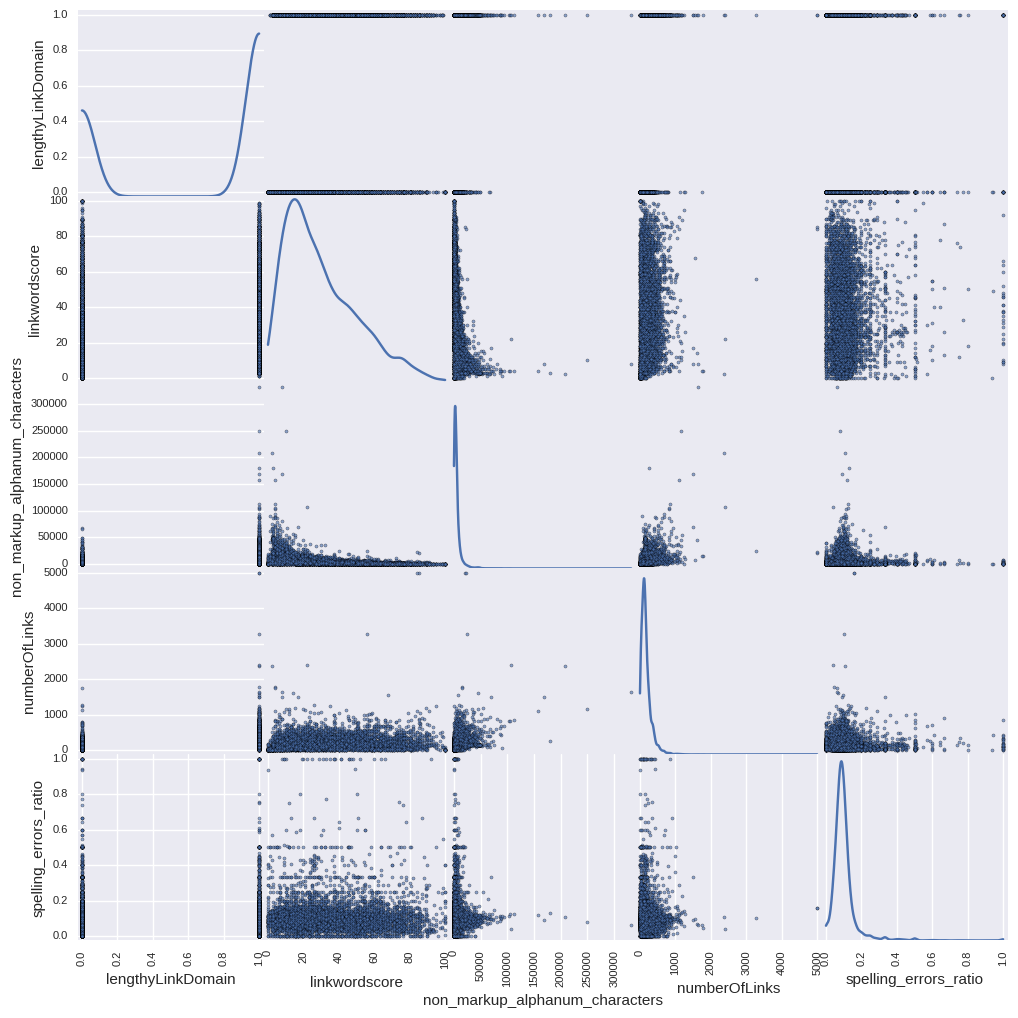

In [204]:
text = all_data[['lengthyLinkDomain','linkwordscore','non_markup_alphanum_characters','numberOfLinks','spelling_errors_ratio']]
pd.tools.plotting.scatter_matrix(text, alpha = 0.6, figsize = (12,12), diagonal = 'kde' )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6308a45610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6308a6bb50>]], dtype=object)

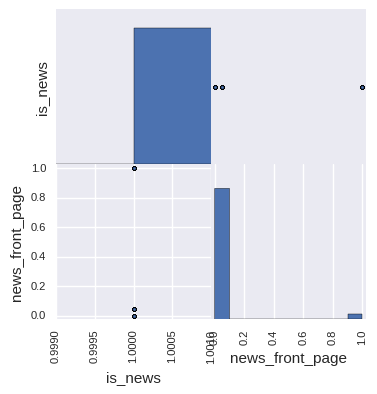

In [205]:
news = all_data[['is_news','news_front_page']]
pd.tools.plotting.scatter_matrix(news, alpha = 0.6, figsize = (4,4), diagonal = 'hist' )

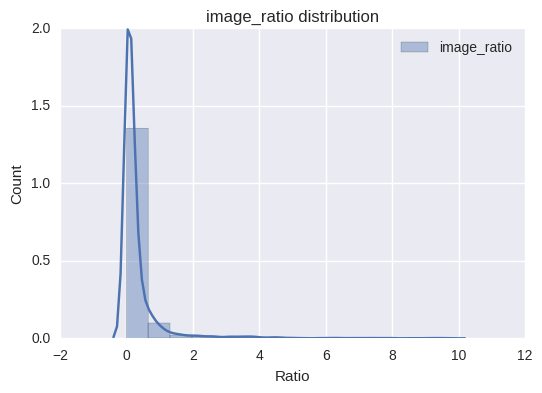

In [195]:
# plt.hist(all_data['image_ratio'], normed=True, bins = 30, range=(0,10), align = 'left')
# plt.title('image_ratio distribution')
# plt.show()
filtered = all_data[(all_data['image_ratio'] > 0) & (all_data['image_ratio'] < 10)]
sns.distplot(filtered.image_ratio, bins = 15, kde = True, label='image_ratio')
plt.title('image_ratio distribution')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.legend(loc="upper right")


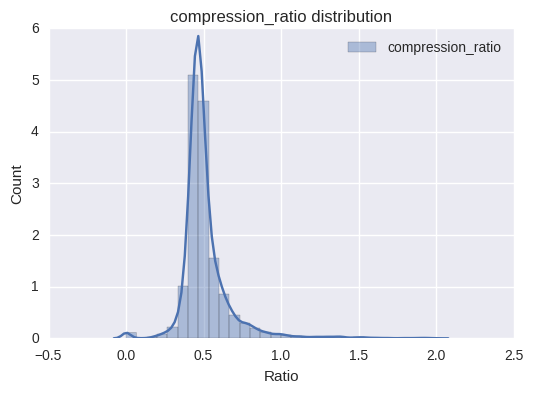

In [198]:
filtered = all_data[(all_data['compression_ratio'] >= 0) & (all_data['compression_ratio'] <= 2)]
sns.distplot(filtered.compression_ratio, bins = 30, kde = True, label='compression_ratio')
plt.title('compression_ratio distribution')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.legend(loc="upper right")


# cleaning

### Remove Outliers

In [583]:
filtered_train_data = train_data.copy()
filtered_train_data = filtered_train_data[filtered_train_data['avglinksize'] < 1062]
filtered_train_data = filtered_train_data[filtered_train_data['numberOfLinks'] < 1500]
filtered_train_data = filtered_train_data[filtered_train_data['non_markup_alphanum_characters'] < 15000]

filtered_train_data = filtered_train_data[filtered_train_data['image_ratio'] <= 4]
filtered_train_data = filtered_train_data[(filtered_train_data['compression_ratio'] <= 2) | (filtered_train_data['compression_ratio'] > 20)]

In [289]:
# filltered_train_data = filltered_train_data[filltered_train_data.compression_ratio > 1]
# filltered_train_data = train_data[np.abs(train_data.avglinksize-train_data.avglinksize.mean())<=(2*train_data.avglinksize.std())] #keep only the ones that are within +3 to -3 std.
# filltered_train_data = filltered_train_data[np.abs(train_data.compression_ratio-train_data.compression_ratio.mean())<=(3*train_data.compression_ratio.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
# filltered_train_data = filltered_train_data[np.abs(train_data.compression_ratio-train_data.compression_ratio.mean())<=(3*train_data.compression_ratio.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

#  Data Normalization

In [584]:
regular_cols_to_norm = ['embed_ratio','linkwordscore','avglinksize', 
                        'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url']

data = filtered_train_data.append(test_data, ignore_index = True)
train_len = len(filtered_train_data)

data.ix[data.compression_ratio > 20, 'high_compression_ratio'] = 1
data.ix[data.compression_ratio <= 20, 'high_compression_ratio'] = 0

# filtered_train_data.ix[filtered_train_data.compression_ratio > 20, 'high_compression_ratio'] = 1
# filtered_train_data.ix[filtered_train_data.compression_ratio <= 20, 'high_compression_ratio'] = 0


data[regular_cols_to_norm] = data[regular_cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# filtered_train_data[regular_cols_to_norm] = filtered_train_data[regular_cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# test_data[regular_cols_to_norm] = test_data[regular_cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [585]:
data.ix[data.compression_ratio > 20, 'high_compression_ratio'] = 1
data.ix[data.compression_ratio <= 20, 'high_compression_ratio'] = 0

# filtered_train_data.ix[filtered_train_data.compression_ratio > 20, 'high_compression_ratio'] = 1
# filtered_train_data.ix[filtered_train_data.compression_ratio <= 20, 'high_compression_ratio'] = 0

# test_data.ix[test_data.compression_ratio > 20, 'high_compression_ratio'] = 1
# test_data.ix[test_data.compression_ratio <= 20, 'high_compression_ratio'] = 0

In [586]:
data.ix[data.compression_ratio > 20, 'compression_ratio'] = 2

# filtered_train_data.ix[filtered_train_data.compression_ratio > 20, 'compression_ratio'] = 2
# test_data.ix[test_data.compression_ratio > 20, 'compression_ratio'] = 2

In [587]:
special_cols_to_norm = ['compression_ratio', 'image_ratio']
data[special_cols_to_norm] = data[special_cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# filtered_train_data[special_cols_to_norm] = filtered_train_data[special_cols_to_norm].apply(lambda x: (x - x.min())
#                                                                                             / (x.max() - x.min()))
# test_data[special_cols_to_norm] = test_data[special_cols_to_norm].apply(lambda x: (x - x.min())
#                                                                         / (x.max() - x.min()))
special_cols_to_norm.append('high_compression_ratio')
data[special_cols_to_norm].describe()

,compression_ratio,image_ratio,high_compression_ratio
count,9945.000000,9945.000000,9945.000000
mean,0.058805,0.039628,0.088487
std,0.045015,0.030342,0.284016
min,0.000000,0.000000,0.000000
25%,0.040364,0.034200,0.000000
50%,0.044074,0.036043,0.000000
75%,0.052851,0.041026,0.000000
max,1.000000,1.000000,1.000000


### Drop Unnecessary Column

In [383]:
# normalized_train_data = normalized_train_data.drop('compression_ratio', axis = 1)
# normalized_train_data = normalized_train_data.drop('embed_ratio', axis = 1)
# normalized_train_data = normalized_train_data.drop('image_ratio', axis = 1)

# normalized_train_data = normalized_train_data.join(df_alchemy_category) #don't run more than 1 time!
# normalized_train_data = normalized_train_data.drop('alchemy_category', axis = 1)
# normalized_train_data = normalized_train_data.drop(['url', 'urlid'], axis = 1)


In [588]:
data_set = data.copy()
train_set = data_set[:train_len].copy() # filtered_train_data.copy()
test_set = data_set[train_len:].drop('label', axis = 1) # test_data.copy()

# Utils

In [589]:
def plotRoc(fpr, tpr, auc):
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def plot_results(x, y, tag, arg):
    plt.plot(x, y)
    plt.title(tag + " as a function of " + arg)
    plt.xlabel(arg)
    plt.ylabel(tag)
    plt.show()

def plot_cross_val(cs, cv_scores, arg):
    plt.plot(cs, cv_scores)
    plt.title("ROC AUC as a function of " + arg)
    plt.xlabel(arg)
    plt.ylabel("ROC AUC")
    ax = plt.axes()
    ax.set_xscale('log')
    plt.show()

# TF - IDF

In [592]:
train_labels = train_set['label']
test_urlids = test_set['urlid']
all_data_text = data_set['boilerplate']

tfv = TfidfVectorizer(min_df=8, max_features=None, strip_accents='unicode',
                          analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 2), use_idf=1, smooth_idf=1,
                          sublinear_tf=1)
tfidf_all_data = tfv.fit_transform((np.array(all_data_text))) 

tfidf_train = tfidf_all_data[:len(train_set)]
tfidf_test = tfidf_all_data[len(train_set):]

(9945, 73409)


## TF-IDF logistic regression parameter optimization

C=0.01: 0.5
C=0.0316227766017: 0.5
C=0.1: 0.794797752205
C=0.316227766017: 0.850810665381
C=1.0: 0.866013638621
C=3.16227766017: 0.865068355856
C=10.0: 0.842912999068
C=31.6227766017: 0.830896289354
C=100.0: 0.823376988729


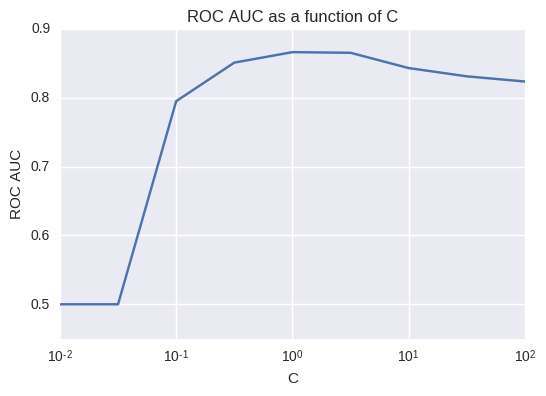

In [488]:
cv_scores = []
for c in np.logspace(-2,2, num=9):
    res = cross_val_score(lm.LogisticRegression(penalty="l1", C=c), tfidf_train, train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (c, np.average(res))
    cv_scores.append(np.average(res))

plot_cross_val(np.logspace(-2,2, num=9), cv_scores)
lr_selceted_c = np.logspace(-2,2, num=9)[cv_scores.index(max(cv_scores))]

C=0.316227766017: 0.850815025621
C=0.56234132519: 0.86146889266
C=1.0: 0.866007522172
C=1.77827941004: 0.869233849194
C=3.16227766017: 0.86506227978
C=5.6234132519: 0.853958694794
C=10.0: 0.842897284034


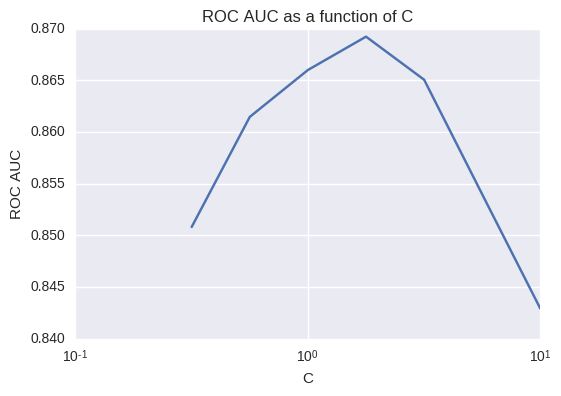

tf-idf LR best parameters:
C = 1.77827941004


In [508]:
cv_scores = []
for c in np.logspace(-0.5,1, num=7):
    res = cross_val_score(lm.LogisticRegression(penalty="l1", C=c), tfidf_train, train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (c, np.average(res))
    cv_scores.append(np.average(res))

plot_cross_val(np.logspace(-0.5,1, num=7), cv_scores)
lr_selceted_c = np.logspace(-0.5,1, num=7)[cv_scores.index(max(cv_scores))]

# Print best hyper parameters
print "tf-idf LR best parameters:"
print "C = %s" % lr_selceted_c

## TF-IDF logistic regression running 

training tf-idf logistic regression
getting tf-idf logistic regression predictions
tfidf logistic regression train set auc: 0.946431368206


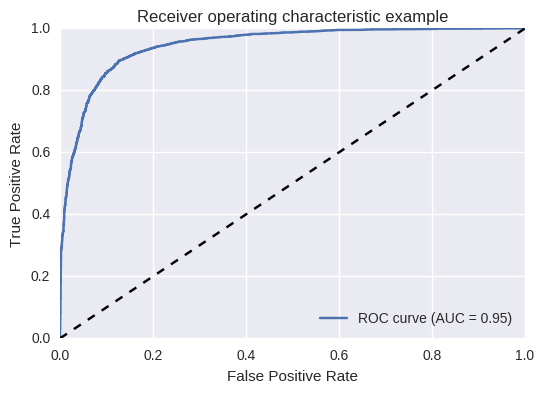

In [599]:
print "training tf-idf logistic regression"
lr = lm.LogisticRegression(penalty='l2', dual=True, C=0.8) #lr_selceted_c)

lr.fit(tfidf_train, train_labels)
print "getting tf-idf logistic regression predictions"
lr_predictions = lr.predict_proba(tfidf_all_data)[:, 1]
lr_train_predictions = lr_predictions[:train_len]
lr_test_predictions = lr_predictions[train_len:]

for_csv = pd.DataFrame()
for_csv['urlid'] = test_urlids
for_csv['label'] = lr_test_predictions
for_csv.to_csv("tfidf_lr_test_predictions.csv", index=False)

fpr, tpr, thresholds = metrics.roc_curve(labels, lr_train_predictions)
lr_auc = metrics.auc(fpr, tpr)
print "tfidf logistic regression train set auc:", lr_auc
plotRoc(fpr, tpr, lr_auc)

#add LR tfidf score as a new feature
# data['tfidf_logistic_regression_prediction'] = lr_predictions
train_set['tfidf_logistic_regression_prediction'] = lr_train_predictions
test_set['tfidf_logistic_regression_prediction'] = lr_test_predictions

In [528]:
print "dropping 'boilerplate' column from all data"
train_set.drop('boilerplate', 1, inplace=True)
test_set.drop('boilerplate', 1, inplace=True)

dropping 'boilerplate' column from all data


## Random Forset feature selection

#### Preprocessing

In [529]:
data_set = train_set.append(test_set, ignore_index = True)
train_len = len(train_set)

alchemy_category_dv = pd.get_dummies(data_set['alchemy_category'])
pp_data_set = pd.concat([data_set, alchemy_category_dv], axis=1)

pp_train_set = pp_data_set[:train_len]
pp_test_set = pp_data_set[train_len:]

pp_test_urlids = pp_test_set['urlid']
pp_train_labels = pp_train_set['label']

pp_train_set = pp_train_set.drop(['url', 'urlid', 'alchemy_category', 'label'] , 1)
pp_test_set = pp_test_set.drop(['url', 'urlid', 'alchemy_category', 'label'] , 1)


#### Calculating feature importance

Feature ranking - Top 10:
1. feature 23 (tfidf_logistic_regression_prediction)
   score: 0.519745
2. feature 18 (non_markup_alphanum_characters)
   score: 0.041580
3. feature 8 (frameTagRatio)
   score: 0.034395
4. feature 16 (linkwordscore)
   score: 0.031111
5. feature 1 (avglinksize)
   score: 0.029643
6. feature 22 (spelling_errors_ratio)
   score: 0.028989
7. feature 6 (compression_ratio)
   score: 0.027741
8. feature 12 (html_ratio)
   score: 0.027189
9. feature 19 (numberOfLinks)
   score: 0.025813
10. feature 13 (image_ratio)
   score: 0.024501


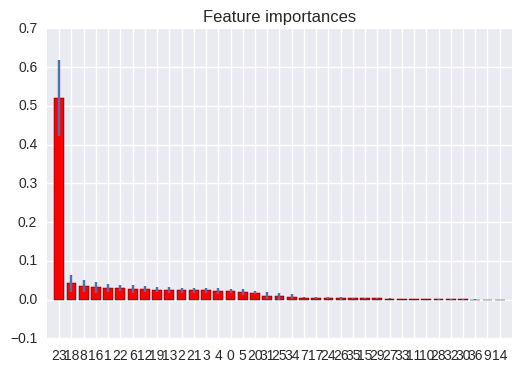

In [530]:
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)
labels = pp_train_labels.values

data_to_fit = pp_train_set.values
forest.fit(data_to_fit, labels)

forest_train_predictions = forest.predict_proba(pp_train_set)
forest_test_predictions = forest.predict_proba(pp_test_set)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking - Top 10:")
for f in range(10):
    print("%d. feature %d (%s)\n   score: %f" % (f + 1, indices[f], list(pp_train_set)[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_to_fit.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_to_fit.shape[1]), indices)
plt.xlim([-1, data_to_fit.shape[1]])
plt.show()

In [439]:
fpr, tpr, thresholds = metrics.roc_curve(labels, forest_train_predictions[:,1])
auc_result = metrics.auc(fpr, tpr)
print('base auc results: ' + str(auc_result))

base auc results: 1.0


## Random Forest parameter optimization

In [440]:
importances_thresholds = [0, 0.01, 0.02, 0.03, 0.04]
max_depths = [3, 6, 9, 12, 15, 18, 21] 
min_samples_leaf = [1] #[1,3,5]


filtered_by_thresholds = []
for t in importances_thresholds:
    columns = []
    for f in range(pp_train_set.shape[1]):
        if importances[indices[f]] >= t:
            columns.append(list(pp_train_set)[indices[f]])
    filtered_by_thresholds.append(columns)

th_oob = []
th_auc = []
for i in range(len(filtered_by_thresholds)):
    d_oobs = []
    d_auc = []
    for d in max_depths:
        for l in min_samples_leaf:
            fc = filtered_by_thresholds[i]
            forest = RandomForestClassifier(n_estimators=250, random_state=0, max_depth=d, oob_score=True)
            forest.fit(pp_train_set[fc].values, labels)
            forest_train_predictions = forest.predict_proba(pp_train_set[fc])
            forest_test_predictions = forest.predict_proba(pp_test_set[fc])
            fpr, tpr, thresholds = metrics.roc_curve(labels, forest_train_predictions[:, 1])
        d_auc.append(metrics.auc(fpr, tpr))
        d_oobs.append(forest.oob_score_)
    th_auc.append(d_auc)
    th_oob.append(d_oobs)

RF best parameters:
max_depths =  15
importance_thresholds =  0
min_samples_leaf =  1
--------------------------
best oob:  0.902716268084
with auc:  0.999804487202


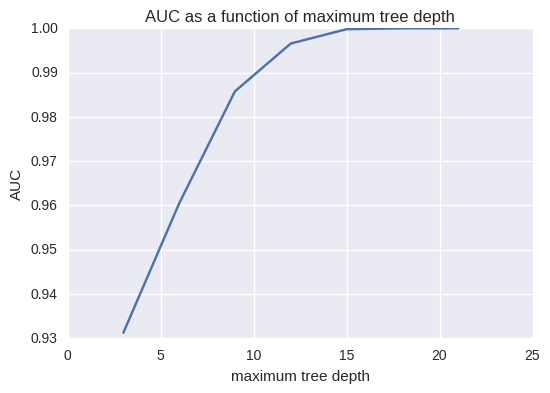

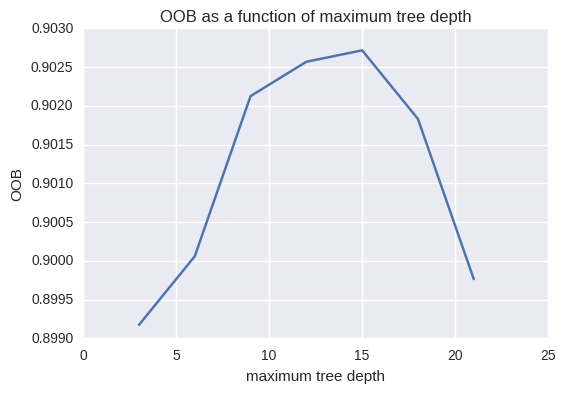

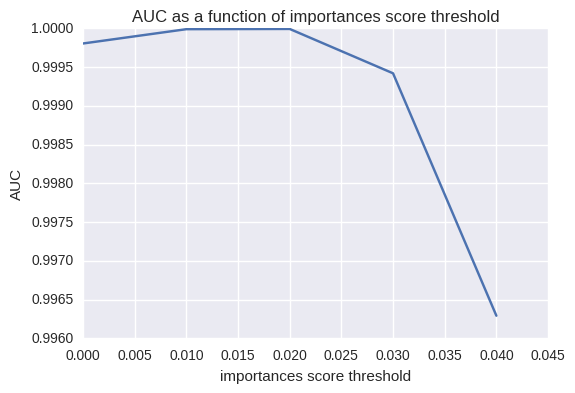

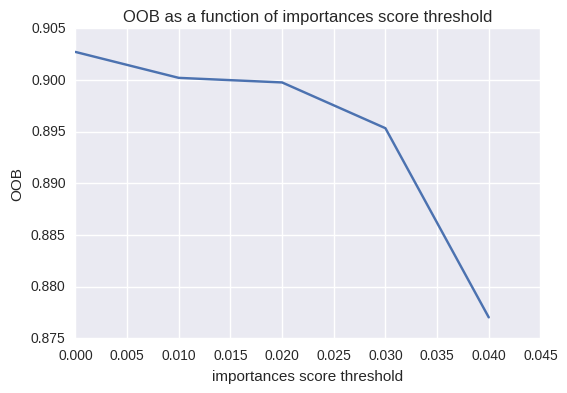

In [441]:
max_idx = np.argmax(th_oob)
th_idx = max_idx / len(th_oob[0])
d_idx = max_idx % len(th_oob[0])

best_max_depths =  max_depths[d_idx]
best_thresholds = importances_thresholds[th_idx]
best_min_leaf = 1

# Print best hyper parameters
print "RF best parameters:"
print "max_depths = ", best_max_depths
print "importance_thresholds = ", best_thresholds
print "min_samples_leaf = ", best_min_leaf

print "--------------------------"
print "best oob: ", th_oob[th_idx][d_idx]
print "with auc: ", th_auc[th_idx][d_idx]

plot_results(max_depths, th_auc[th_idx], "AUC", "maximum tree depth")
plot_results(max_depths, th_oob[th_idx], "OOB", "maximum tree depth")

plot_results(importances_thresholds, [a[d_idx] for a in th_auc], "AUC", "importances score threshold")
plot_results(importances_thresholds, [a[d_idx] for a in th_oob], "OOB", "importances score threshold")

## Random Forest run

min_samples_leaf is 1 by defult

In [442]:
fc = filtered_by_thresholds[best_thresholds]
forest = RandomForestClassifier(n_estimators=250, random_state=0, max_depth=best_max_depths, oob_score=True)
forest.fit(pp_train_set[fc].values, labels)
forest_train_predictions = forest.predict_proba(pp_train_set[fc])
forest_test_predictions = forest.predict_proba(pp_test_set[fc])
fpr, tpr, thresholds = metrics.roc_curve(labels, forest_train_predictions[:, 1])

rf_auc = metrics.auc(fpr, tpr)
print "rf train set auc:", rf_auc

plotRoc(fpr, tpr, rf_auc)

#Save test results
for_csv = pd.DataFrame()
for_csv['urlid'] = pp_test_urlids
for_csv['label'] = forest_test_predictions[:, 1]
for_csv.to_csv("rf_test_predictions.csv", index=False)

## Logistic Regression and SVM feature selection

#### Preprocessing

In [533]:
data = train_set.append(test_set, ignore_index = True)
train_len = len(train_set)

alchemy_category_dv = pd.get_dummies(data['alchemy_category'])
pp_set = pd.concat([data, alchemy_category_dv], axis=1)

pp_train_set = pp_set[:train_len]
pp_test_set = pp_set[train_len:]

pp_test_urlids = pp_test_set['urlid']

pp_train_labels = pp_train_set['label']
pp_train_set = pp_train_set.drop(['url', 'urlid', 'alchemy_category', 'label', 'avglinksize', 'lengthyLinkDomain', 'linkwordscore'] , 1)
pp_test_set = pp_test_set.drop(['url', 'urlid', 'alchemy_category', 'label', 'avglinksize', 'lengthyLinkDomain', 'linkwordscore'] , 1)


pp_train_set['link_ratio_average'] = pp_train_set.apply(lambda row: np.average([row['commonlinkratio_1'], row['commonlinkratio_2'], row['commonlinkratio_3'], row['commonlinkratio_4']]), axis=1)
pp_train_set = pp_train_set.drop(['commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4'] , 1)
pp_test_set['link_ratio_average'] = pp_test_set.apply(lambda row: np.average([row['commonlinkratio_1'], row['commonlinkratio_2'], row['commonlinkratio_3'], row['commonlinkratio_4']]), axis=1)
pp_test_set = pp_test_set.drop(['commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4'] , 1)


## Logistic Regression parameter optimization

C=0.01: 0.959148284518
C=0.1: 0.959221139395
C=1: 0.958844175395
C=10: 0.958533833752
C=100: 0.958488467567
C=1000: 0.958484122466
C=10000: 0.958495464643
C=100000: 0.958486749208
C=1000000: 0.958493728621


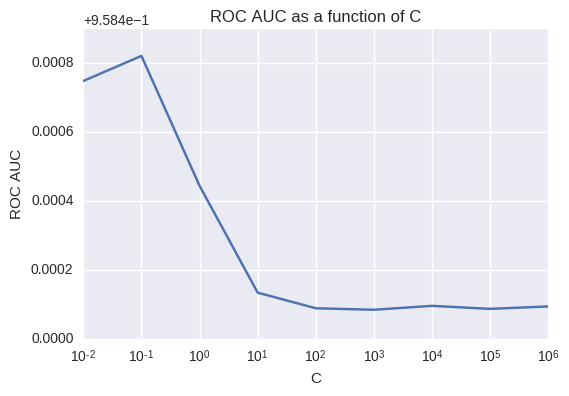

In [444]:
cv_scores = []
cs = []
for c in range(-4,3):
    res = cross_val_score(lm.LogisticRegression(penalty="l1", C=10**c), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (10**c, np.average(res))
    cs.append(10**c)
    cv_scores.append(np.average(res))

plot_cross_val(cs, cv_scores, "C")

C=0.01: 0.959148284518
C=0.016681005372: 0.959148284518
C=0.0278255940221: 0.959127328616
C=0.0464158883361: 0.959080191084
C=0.0774263682681: 0.959108565451
C=0.129154966501: 0.959229115507
C=0.215443469003: 0.959143818299
C=0.35938136638: 0.959111691804
C=0.599484250319: 0.958967062015
C=1.0: 0.958844177918


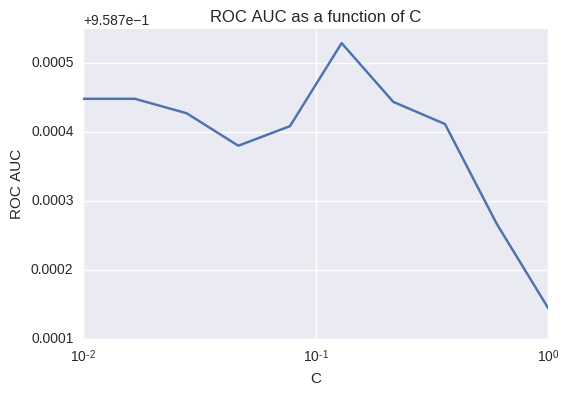

LR best parameters:
C = 0.129154966501


In [448]:
cv_scores = []
for c in np.logspace(-2,0, num=10):
    res = cross_val_score(lm.LogisticRegression(penalty="l1", C=c), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (c, np.average(res))
    cv_scores.append(np.average(res))

plot_cross_val(np.logspace(-2,0, num=10), cv_scores, "C")
lr_selceted_c = np.logspace(-2,0, num=10)[cv_scores.index(max(cv_scores))]

# Print best hyper parameters
print "LR best parameters:"
print "C = %s" % lr_selceted_c

## Logistic Regression run 

In [449]:
lr = lm.LogisticRegression(penalty="l1", C=lr_selceted_c)
lr.fit(pp_train_set, pp_train_labels)
lr_train_prediction = lr.predict_proba(pp_train_set)
lr_test_prediction = lr.predict_proba(pp_test_set)

fpr, tpr, thresholds = metrics.roc_curve(pp_train_labels, lr_train_prediction[:,1])
lr_train_auc = metrics.auc(fpr, tpr)
print "logistic regression train set auc:", lr_train_auc

plotRoc(fpr, tpr, lr_train_auc)

for_csv = pd.DataFrame()
for_csv['urlid'] = pp_test_urlids
for_csv['label'] = lr_test_prediction[:,1]
for_csv.to_csv("lr_test_predictions.csv", index=False)

logistic regression train set auc: 0.959814315165


## SVM parameter optimization

C=1e-05: 0.924034524628
C=0.0001: 0.924221205001
C=0.001: 0.924305003376
C=0.01: 0.924335532631
C=0.1: 0.955402865546
C=1: 0.959022978065
C=10: 0.959589044794
C=100: 0.959139546373
C=1000: 0.952665714378
C=10000: 0.945089861835


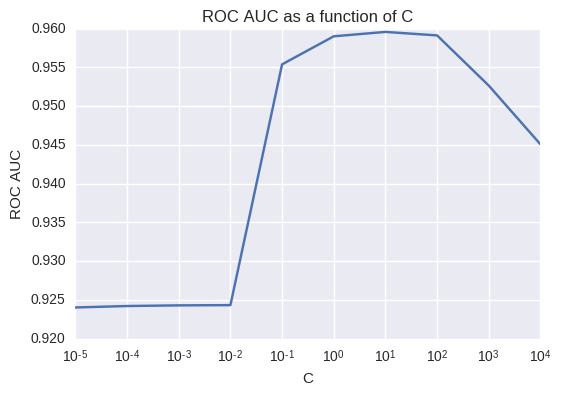

In [450]:
cv_scores = []
cs = []
for c in range(-5,5):
    res = cross_val_score(svm.SVC(C=10**c), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (10**c, np.average(res))
    cs.append(10**c)
    cv_scores.append(np.average(res))
    
plot_cross_val(cs, cv_scores, "C")

C=0.1: 0.955402865546
C=0.278255940221: 0.957763605313
C=0.774263682681: 0.958795438098
C=2.15443469003: 0.959295937204
C=5.99484250319: 0.959416467075
C=16.681005372: 0.959698060904
C=46.4158883361: 0.959670024658
C=129.154966501: 0.958832474911
C=359.38136638: 0.956132257101
C=1000.0: 0.952665714378


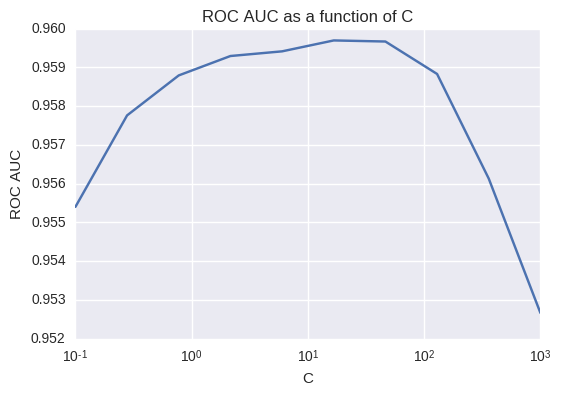

In [451]:
cv_scores = []
for c in np.logspace(-1,3, num=10):
    res = cross_val_score(svm.SVC(C=c), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "C=%s: %s" % (c, np.average(res))
    cv_scores.append(np.average(res))

plot_cross_val(np.logspace(-1,3, num=10), cv_scores, "C")
svm_selceted_c = np.logspace(-1,3, num=10)[cv_scores.index(max(cv_scores))]

gamma=0.0001: 0.953549258608
gamma=0.000421696503429: 0.957656347935
gamma=0.00177827941004: 0.95907270449
gamma=0.00749894209332: 0.959358817527
gamma=0.0316227766017: 0.959693695617
gamma=0.133352143216: 0.956917612647
gamma=0.56234132519: 0.946551869706
gamma=2.37137370566: 0.935075186395
gamma=10.0: 0.913732575439


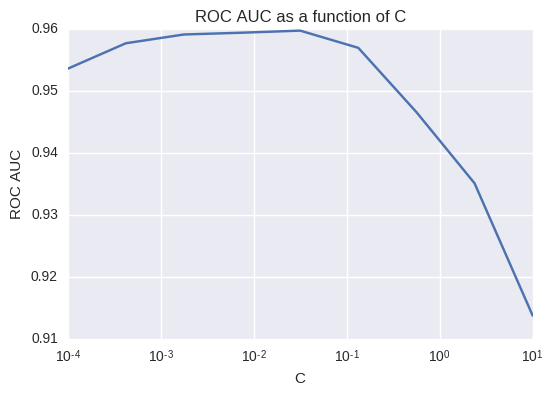

SVM best parameters:
C = 16.681005372
gamma = 0.0316227766017


In [454]:
cv_scores = []
for g in np.logspace(-4,1, num=9):
    res = cross_val_score(svm.SVC(C=svm_selceted_c, gamma=g), pp_train_set, pp_train_labels, cv=10, scoring='roc_auc')
    print "gamma=%s: %s" % (g, np.average(res))
    cv_scores.append(np.average(res))

plot_cross_val(np.logspace(-4,1, num=9), cv_scores, "gamma")
svm_selceted_gamma = np.logspace(-4,1, num=9)[cv_scores.index(max(cv_scores))]

# Print best hyper parameters
print "SVM best parameters:"
print "C = %s" % svm_selceted_c
print "gamma = %s" % svm_selceted_gamma

## SVM run

svm train set auc: 0.961802188488


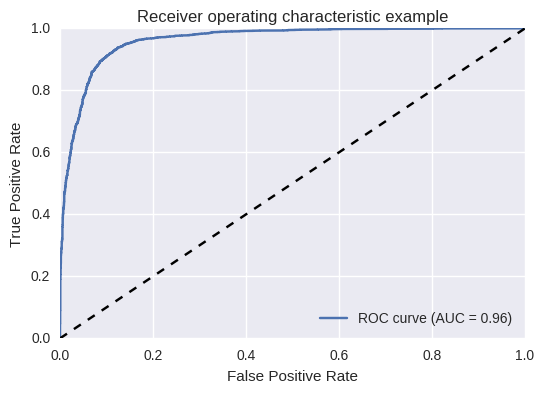

In [456]:
# svm_selceted_c = 16.681005372
# svm_selceted_gamma = 0.0316227766017

svm_model = svm.SVC(probability=True, C=svm_selceted_c, gamma=svm_selceted_gamma)
svm_model.fit(pp_train_set, pp_train_labels)
svm_train_prediction = svm_model.predict_proba(pp_train_set)
svm_test_prediction = svm_model.predict_proba(pp_test_set)

fpr, tpr, thresholds = metrics.roc_curve(pp_train_labels, svm_train_prediction[:,1])
svm_train_auc = metrics.auc(fpr, tpr)
print "svm train set auc:", svm_train_auc

plotRoc(fpr, tpr, svm_train_auc)

for_csv = pd.DataFrame()
for_csv['urlid'] = pp_test_urlids
for_csv['label'] = svm_test_prediction[:,1]
for_csv.to_csv("svm_test_predictions.csv", index=False)